## Step 0: Imports and Reading Data

In [1]:
#pip install --upgrade seaborn

In [2]:
# Load the libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import re
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

from scipy.stats.mstats import winsorize
import scipy.stats as stats
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,explained_variance_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve)

from statsmodels.tools.eval_measures import mse, rmse
from sklearn import preprocessing
## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns', None)

In [3]:
import mysql.connector

In [4]:
connection = mysql.connector.connect(
host="localhost",
user="root",
password="ParklandsRow7*",
database="ireland_avg_earnings"
)

In [5]:
query = "SELECT * FROM avg_earnings"

In [6]:
df = pd.read_sql(query, connection);
df.head()

,Year,Quarter,Manual_employee_grades,Skilled_operatives,Apprentices,Semi_skilled_adults,Clerical_employees_female,Clerical_employees_male,Clerical_and_Operatives,Foremen_and_supervisors
0,1969,Q1,26,25,12,21,14,22,35,25
1,1969,Q2,26,27,12,23,14,22,35,25
2,1969,Q3,26,30,12,24,14,22,35,25
3,1969,Q4,26,29,12,23,14,22,35,25
4,1970,Q1,26,29,12,24,14,22,35,25


In [7]:
df.tail()

,Year,Quarter,Manual_employee_grades,Skilled_operatives,Apprentices,Semi_skilled_adults,Clerical_employees_female,Clerical_employees_male,Clerical_and_Operatives,Foremen_and_supervisors
155,2007,Q4,878,946,529,838,545,724,1094,842
156,2008,Q1,861,920,495,829,540,724,1079,829
157,2008,Q2,842,912,490,803,544,719,1086,813
158,2008,Q3,848,919,531,799,543,762,1102,820
159,2008,Q4,855,913,535,796,540,760,1083,822


In [8]:
df.shape

(160, 10)

In [9]:
df.dtypes

Year                          int64
Quarter                      object
Manual_employee_grades        int64
Skilled_operatives            int64
Apprentices                   int64
Semi_skilled_adults           int64
Clerical_employees_female     int64
Clerical_employees_male       int64
Clerical_and_Operatives       int64
Foremen_and_supervisors       int64
dtype: object

In [10]:
df.describe()

,Year,Manual_employee_grades,Skilled_operatives,Apprentices,Semi_skilled_adults,Clerical_employees_female,Clerical_employees_male,Clerical_and_Operatives,Foremen_and_supervisors
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.00000,160.000000,160.000000
mean,1988.500000,321.456250,363.031250,189.756250,303.337500,202.006250,278.93750,412.068750,312.831250
std,11.579639,252.696946,282.183187,149.140757,237.063824,158.263314,213.11519,320.970739,244.336484
min,1969.000000,26.000000,25.000000,12.000000,21.000000,14.000000,22.00000,35.000000,25.000000
25%,1978.750000,101.250000,115.750000,57.750000,98.500000,62.000000,87.00000,128.750000,99.250000
50%,1988.500000,249.000000,273.500000,152.000000,237.000000,160.000000,222.50000,319.000000,243.500000
75%,1998.250000,462.000000,551.000000,279.250000,406.750000,299.250000,425.00000,619.250000,451.750000
max,2008.000000,878.000000,946.000000,535.000000,838.000000,545.000000,762.00000,1102.000000,842.000000


## Step 2: Data Preperation

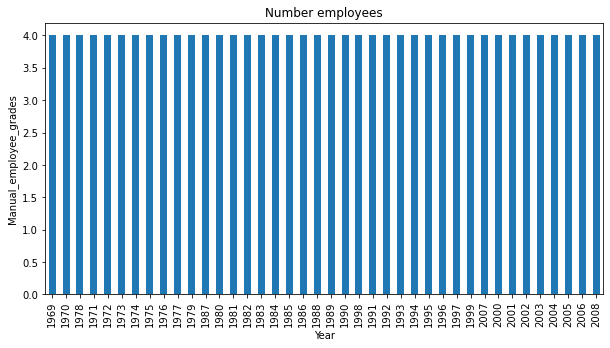

In [11]:
df.Year.value_counts().nlargest(40).plot(kind="bar", figsize=(10,5))
plt.title("Number employees")
plt.ylabel("Manual_employee_grades")
plt.xlabel("Year");

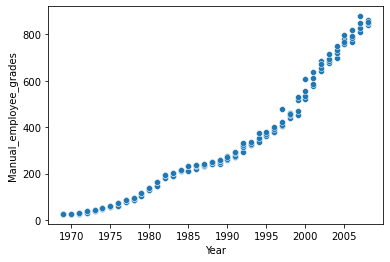

In [12]:
sns.scatterplot(x='Year', y='Manual_employee_grades', data=df)
plt.show()

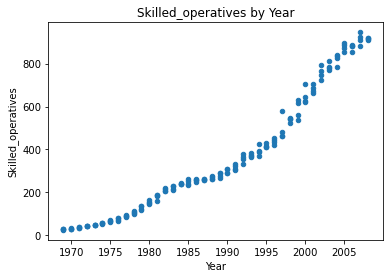

In [13]:
df.plot(kind='scatter',
        x='Year',
        y='Skilled_operatives',
        title='Skilled_operatives by Year')
plt.show()

In [14]:
df_corr=df.drop(["Quarter"],axis=1)
corr = df_corr.corr()
corr

,Year,Manual_employee_grades,Skilled_operatives,Apprentices,Semi_skilled_adults,Clerical_employees_female,Clerical_employees_male,Clerical_and_Operatives,Foremen_and_supervisors
Year,1.000000,0.961501,0.964385,0.964399,0.957358,0.966917,0.969357,0.966736,0.962863
Manual_employee_grades,0.961501,1.000000,0.998883,0.997704,0.999105,0.998709,0.997130,0.999061,0.999973
Skilled_operatives,0.964385,0.998883,1.000000,0.996519,0.996794,0.997261,0.996301,0.998634,0.999067
Apprentices,0.964399,0.997704,0.996519,1.000000,0.996085,0.996678,0.995679,0.997060,0.997694
Semi_skilled_adults,0.957358,0.999105,0.996794,0.996085,1.000000,0.997275,0.994942,0.997177,0.998949
Clerical_employees_female,0.966917,0.998709,0.997261,0.996678,0.997275,1.000000,0.998444,0.999018,0.998810
Clerical_employees_male,0.969357,0.997130,0.996301,0.995679,0.994942,0.998444,1.000000,0.998535,0.997397
Clerical_and_Operatives,0.966736,0.999061,0.998634,0.997060,0.997177,0.999018,0.998535,1.000000,0.999205
Foremen_and_supervisors,0.962863,0.999973,0.999067,0.997694,0.998949,0.998810,0.997397,0.999205,1.000000


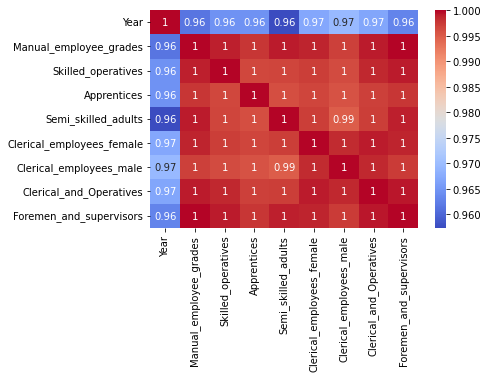

In [15]:
sns.heatmap(corr, annot=True, cmap='coolwarm');

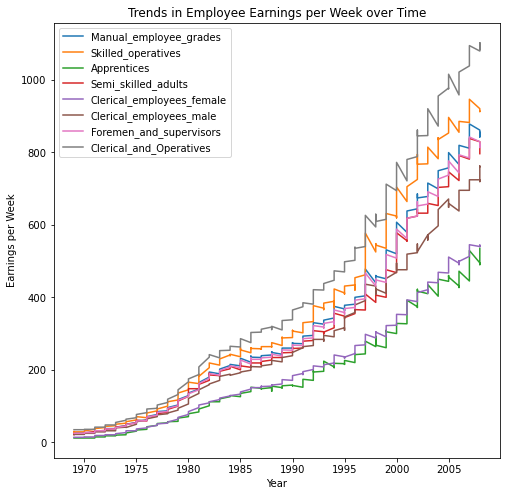

In [16]:
df.plot(x='Year', y=['Manual_employee_grades', 'Skilled_operatives', 'Apprentices', 'Semi_skilled_adults', 'Clerical_employees_female', 'Clerical_employees_male', 'Foremen_and_supervisors', 'Clerical_and_Operatives'],figsize=(8,8))
plt.xlabel('Year')
plt.ylabel('Earnings per Week')
plt.title('Trends in Employee Earnings per Week over Time')
plt.show()


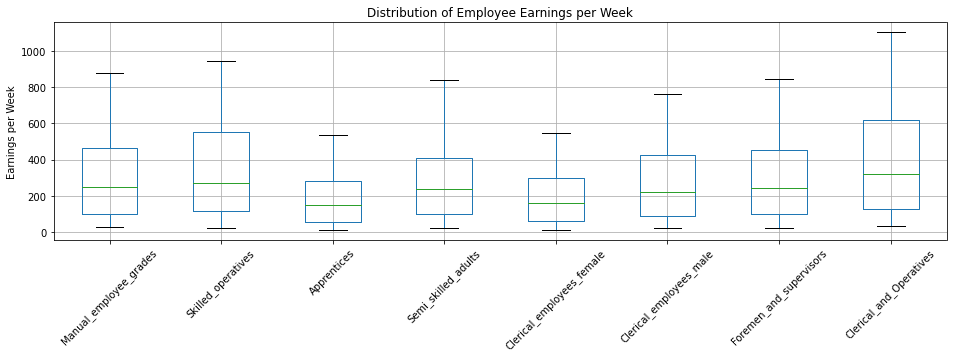

In [17]:
df.boxplot(column=['Manual_employee_grades', 'Skilled_operatives', 'Apprentices', 'Semi_skilled_adults', 'Clerical_employees_female', 'Clerical_employees_male', 'Foremen_and_supervisors', 'Clerical_and_Operatives'], figsize=(16,4), rot=45)
plt.ylabel('Earnings per Week')
plt.title('Distribution of Employee Earnings per Week')
plt.show()

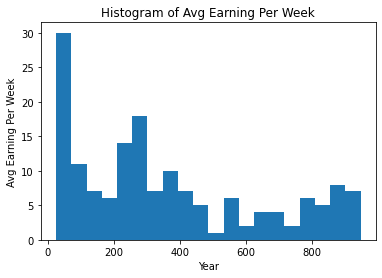

In [18]:
plt.hist(df['Skilled_operatives'], bins=20)
plt.xlabel('Year')
plt.ylabel('Avg Earning Per Week')
plt.title('Histogram of Avg Earning Per Week')
plt.show()

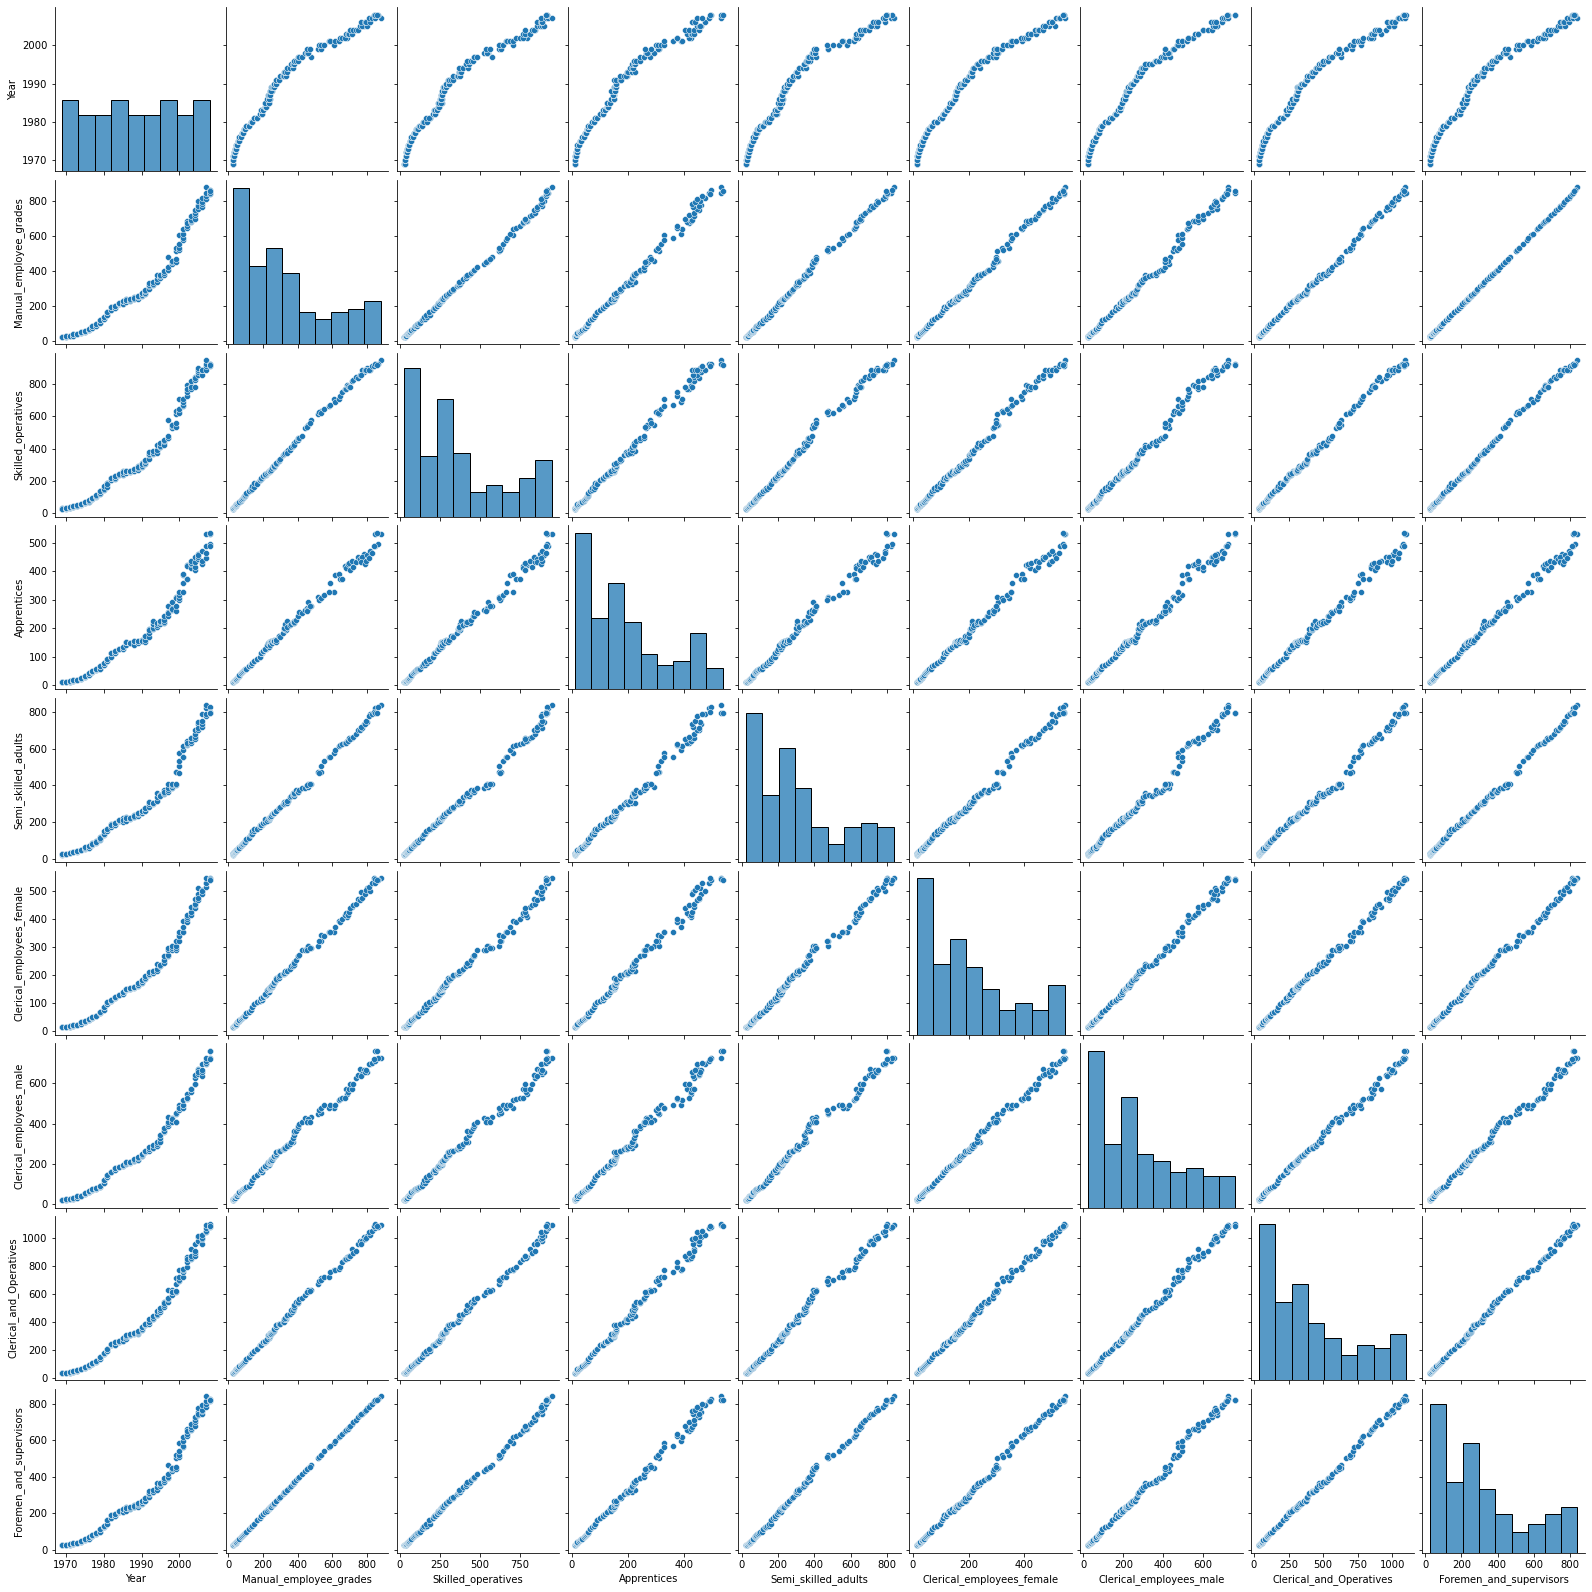

In [19]:
sns.pairplot(df)
plt.show()

In [20]:
df1=df.drop(["Quarter"], axis=1)
log_df1 = np.log(df1)
log_df1.head()

,Year,Manual_employee_grades,Skilled_operatives,Apprentices,Semi_skilled_adults,Clerical_employees_female,Clerical_employees_male,Clerical_and_Operatives,Foremen_and_supervisors
0,7.585281,3.258097,3.218876,2.484907,3.044522,2.639057,3.091042,3.555348,3.218876
1,7.585281,3.258097,3.295837,2.484907,3.135494,2.639057,3.091042,3.555348,3.218876
2,7.585281,3.258097,3.401197,2.484907,3.178054,2.639057,3.091042,3.555348,3.218876
3,7.585281,3.258097,3.367296,2.484907,3.135494,2.639057,3.091042,3.555348,3.218876
4,7.585789,3.258097,3.367296,2.484907,3.178054,2.639057,3.091042,3.555348,3.218876


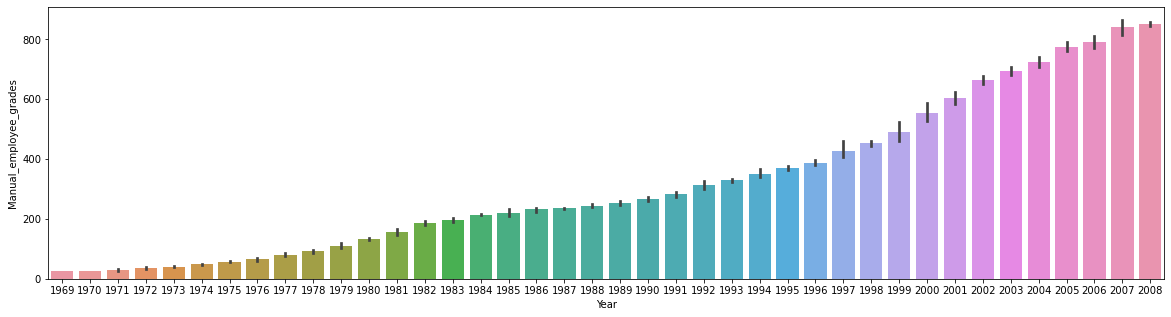

In [21]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x="Year", y="Manual_employee_grades", data=df1)

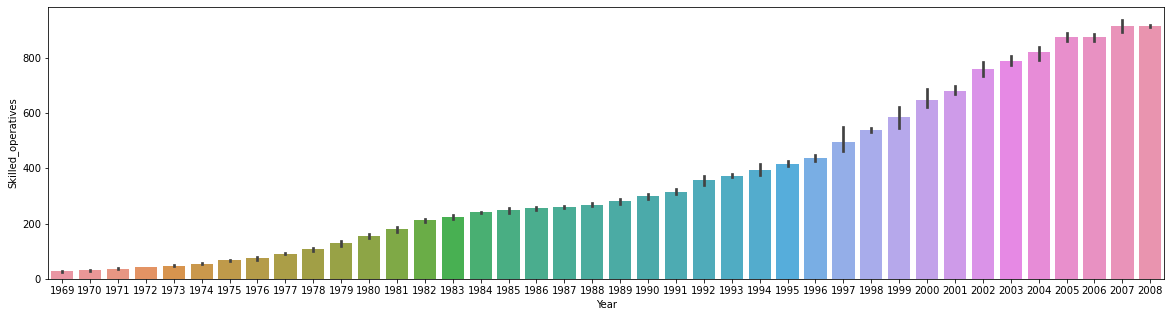

In [22]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x="Year", y="Skilled_operatives", data=df)

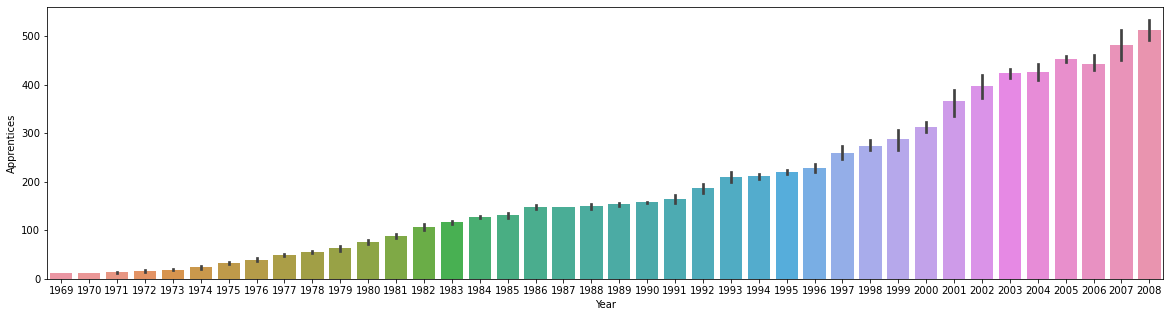

In [23]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x="Year", y="Apprentices", data=df)

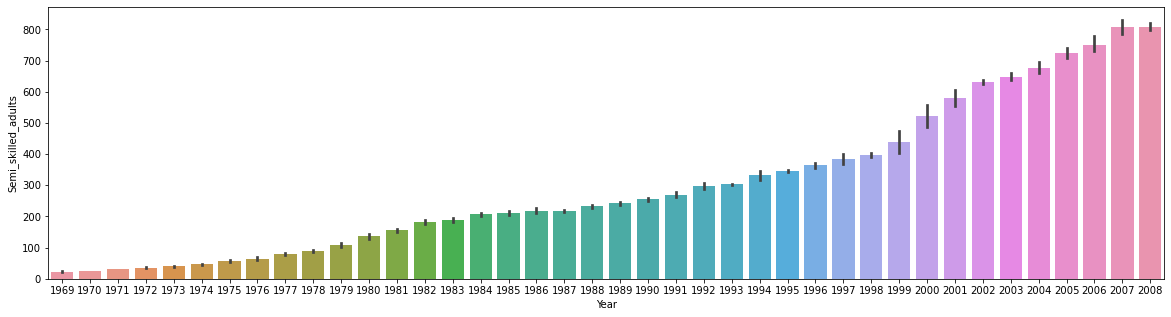

In [24]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x="Year", y="Semi_skilled_adults", data=df)

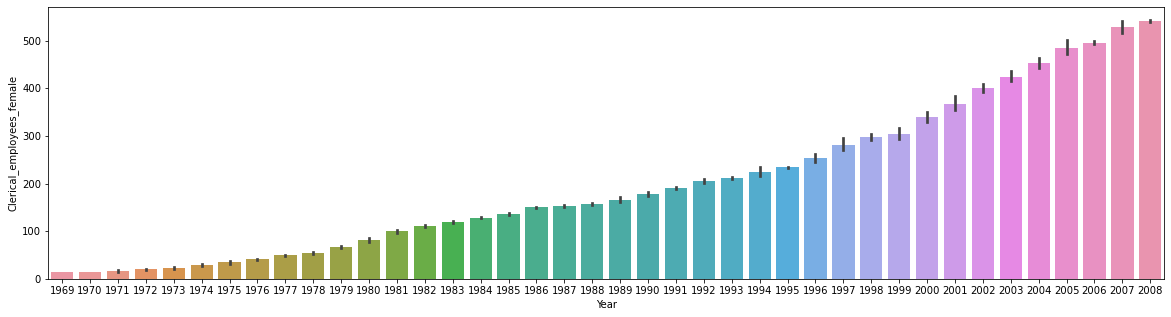

In [25]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x="Year", y="Clerical_employees_female", data=df)

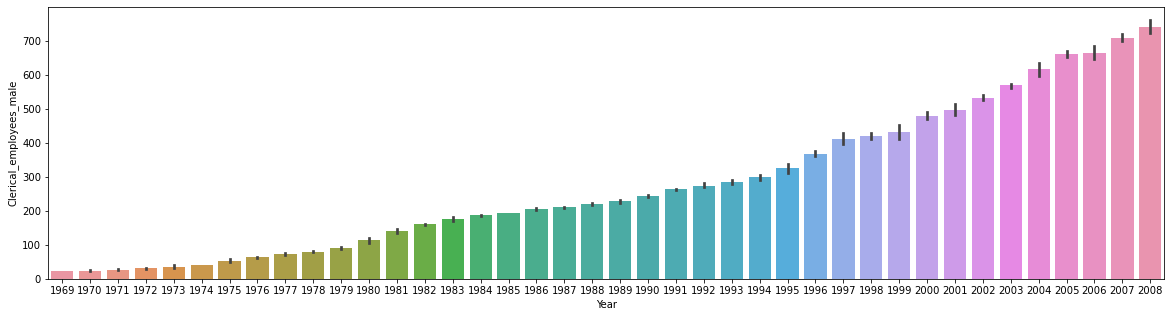

In [26]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x="Year", y="Clerical_employees_male", data=df)

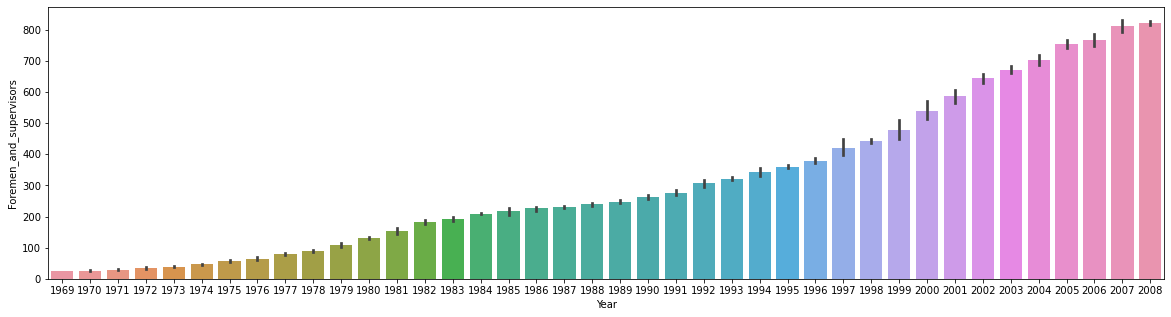

In [27]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x="Year", y="Foremen_and_supervisors", data=df)

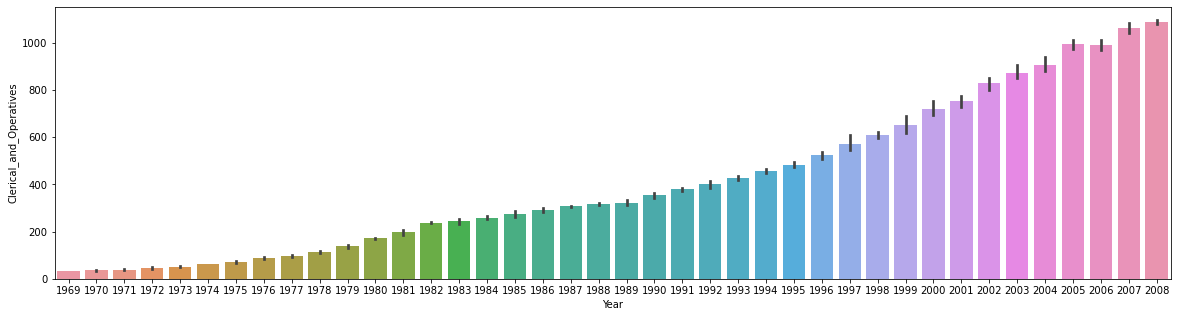

In [28]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x="Year", y="Clerical_and_Operatives", data=df)

## Inferential statistics ##

In [29]:
df.head()

,Year,Quarter,Manual_employee_grades,Skilled_operatives,Apprentices,Semi_skilled_adults,Clerical_employees_female,Clerical_employees_male,Clerical_and_Operatives,Foremen_and_supervisors
0,1969,Q1,26,25,12,21,14,22,35,25
1,1969,Q2,26,27,12,23,14,22,35,25
2,1969,Q3,26,30,12,24,14,22,35,25
3,1969,Q4,26,29,12,23,14,22,35,25
4,1970,Q1,26,29,12,24,14,22,35,25


In [30]:
import scipy.stats as stats
from statsmodels.stats import weightstats

## 1. T-Test One Population - Employer type Apprentices Earnings per week.

In [31]:
df["Apprentices"].mean()

189.75625

In [32]:
X= df["Apprentices"];X

0       12
1       12
2       12
3       12
4       12
      ... 
155    529
156    495
157    490
158    531
159    535
Name: Apprentices, Length: 160, dtype: int64

In [33]:
#H0 : u = 190
#H1 : u =! 190
stats.ttest_1samp(X,190)

Ttest_1sampResult(statistic=-0.020673226974948743, pvalue=0.9835322465112154)

In [34]:
##  statistic=0.020919302333901407 is the t value = 0.02

In [35]:
##  if p-value < 0.05  we reject Ho
## if p-value > 0.05 we accept tht Ho 
## the p- vlaue is 0.983 is greater than 0.05 so we accept Ho

In [36]:
## We accept H0 ---> We reject H1, so there is enough evidence to say that the average Earnings per week of a Apprentices is 190 Euros weekly.

## 2. T-Test - two populations Weekly earning of female employees in Q1 and Q4 

In [37]:
df1=df[['Quarter','Clerical_employees_female']]

In [38]:
df1.head()

,Quarter,Clerical_employees_female
0,Q1,14
1,Q2,14
2,Q3,14
3,Q4,14
4,Q1,14


In [39]:
#We group the data according to the categories requested.
Q1 = df1.query('Quarter == "Q1"')['Clerical_employees_female']
Q4 = df1.query('Quarter == "Q4"')['Clerical_employees_female']

In [40]:
#We perform the test assuming as H0 that mu1 = mu2 (Q1 Earnings = Q4 Earnings)
test = stats.ttest_ind(Q1, Q4, equal_var=True)
display(test)

Ttest_indResult(statistic=-0.3241800309561411, pvalue=0.7466694668941531)

In [41]:
## p-value 0.74 is > alpha 0.05 so we accept the H0

## 3. Confidence Intervel 

In [42]:
import scipy.stats as st

In [43]:
df.head()

,Year,Quarter,Manual_employee_grades,Skilled_operatives,Apprentices,Semi_skilled_adults,Clerical_employees_female,Clerical_employees_male,Clerical_and_Operatives,Foremen_and_supervisors
0,1969,Q1,26,25,12,21,14,22,35,25
1,1969,Q2,26,27,12,23,14,22,35,25
2,1969,Q3,26,30,12,24,14,22,35,25
3,1969,Q4,26,29,12,23,14,22,35,25
4,1970,Q1,26,29,12,24,14,22,35,25


In [44]:
df["Clerical_employees_female"].describe()

count    160.000000
mean     202.006250
std      158.263314
min       14.000000
25%       62.000000
50%      160.000000
75%      299.250000
max      545.000000
Name: Clerical_employees_female, dtype: float64

In [45]:
#DEFINE THE VARIABLE WE FIND THE CONFIDENCE INTERVEL OF WEEKLY EARNINGS OF CLERICAL EMPLOYEES FEMALE
X = df.iloc[:, 6:7].values

In [46]:
#CENTRAL TENDENCY FOR THE AGE
mean = X.mean()
print("The mean is ", mean)

The mean is  202.00625


In [47]:
#create 90% confidence interval for population mean of female employees Earnnigs per week
st.t.interval(alpha=0.95, df=len(X)-1, loc=np.mean(X), scale=st.sem(X)) 

(array([177.29546554]), array([226.71703446]))

In [48]:
## The population average weekly earnings of clerical employees female is between 178 and 228.

## 4. ANOVA_oneway 

In [49]:
import pandas as pd 
from pandas import MultiIndex, Int16Dtype
#!pip install xgboost
import xgboost as xgb

In [50]:
import statistics as stats

In [51]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [52]:
##IMPORTING LIBRARIES
#import statsmodels.api as sm
#from statsmodels.formula.api import ols
#from scipy import stats
#import scipy as scipy

<Figure size 432x288 with 0 Axes>

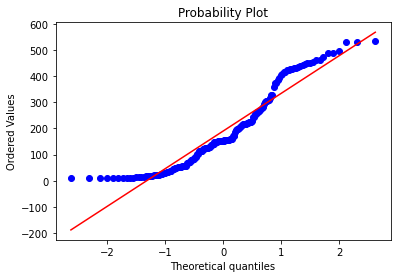

<Figure size 432x288 with 0 Axes>

In [53]:
#Normality plot. Our variable is "Apprentices"
stats.probplot(df.Apprentices, plot=plt)
plt.figure()

In [54]:
## Shapiro wilk test
## H0 : Apprentices employee earnings per week is normally distributed.
## H1 : Apprentices employee earnings per week is not normally distributed.

In [55]:
#Shapiro wilk test
stats.shapiro(df.Apprentices[df.Quarter == "Q1"])

ShapiroResult(statistic=0.9096770286560059, pvalue=0.0037010873202234507)

In [56]:
## pvalue < 0.05 so reject the H0 means Apprentices employee earning per week is not normally distributed.

In [57]:
#Shapiro wilk test
stats.shapiro(df.Apprentices[df.Quarter == "Q2"])

ShapiroResult(statistic=0.9063740968704224, pvalue=0.002945658750832081)

In [58]:
## pvalue < 0.05 so reject the H0 means Apprentices employee earning per week is not normally distributed.

In [59]:
#Shapiro wilk test
stats.shapiro(df.Apprentices[df.Quarter == "Q3"])

ShapiroResult(statistic=0.9077709913253784, pvalue=0.0032430835999548435)

In [60]:
## pvalue < 0.05 so reject the H0 means Apprentices employee earning per week is not normally distributed.

In [61]:
#Shapiro wilk test
stats.shapiro(df.Apprentices[df.Quarter == "Q4"])

ShapiroResult(statistic=0.9048027396202087, pvalue=0.00264522316865623)

In [62]:
## pvalue < 0.05 so reject the H0 means Apprentices employee earning per week is not normally distributed.

In [63]:
df['Quarter'].value_counts()

Quarter
Q1    40
Q2    40
Q3    40
Q4    40
Name: count, dtype: int64

In [64]:
Q1 = df.Apprentices[df.Quarter == "Q1"]

In [65]:
Q2 = df.Apprentices[df.Quarter == "Q2"]

In [66]:
Q3 = df.Apprentices[df.Quarter == "Q3"]

In [67]:
Q4 = df.Apprentices[df.Quarter == "Q4"]

In [68]:
sd1 = Q1.std()
sd1

143.0690863238403

In [69]:
sd2 = Q2.std()
sd2

147.12827126398312

In [70]:
sd3 = Q3.std()
sd3

152.69021554466718

In [71]:
sd4 = Q4.std()
sd4

158.306532819506

In [72]:
# check the homogeneity of the variances between the variables.

#Homogeinity of variance: Levene's test.

# H0 : Variance between the Quarterly earnings are equal
# H1 : Variance between the Quarterly earnings are not equal

from scipy.stats import levene

In [73]:
levene(Q1, Q2, Q3, center = 'mean')

LeveneResult(statistic=0.09805273053931886, pvalue=0.9066755157248975)

In [74]:
## pvalue=0.9050 > alpha(0.05) we accept the H0

In [75]:
import statsmodels.api as sm

In [76]:
from statsmodels.formula.api import ols

In [77]:
#ONE-WAY ANOVA

# H0 : mu(Q1)=mu(Q2)=mu(Q3)=mu(Q4)
# H1 : At least 2 mu's are different

model = ols('Apprentices~Quarter', data = df).fit()
aov = sm.stats.anova_lm(model, type=2)
print(aov)

             df        sum_sq       mean_sq         F    PR(>F)
Quarter     3.0  7.492169e+03   2497.389583  0.110393  0.953924
Residual  156.0  3.529139e+06  22622.687981       NaN       NaN


In [78]:
## degrees of freedom is (n-1) = 4-1 =3
## F = 0.111 abs
## Pvalue = 0.95
## As Pvalue is > alpha(0.05) we accept the H0, means the variance are equal in each Quater earnings. or we don't have reason to 
## belive that there are significant differences between the earnings per quater.


## 4. ANOVA_Two way 

In [79]:
df['Quarter'].value_counts()

Quarter
Q1    40
Q2    40
Q3    40
Q4    40
Name: count, dtype: int64

In [80]:
df['Clerical_employees_male'].value_counts()

Clerical_employees_male
22     6
29     4
32     4
25     4
572    3
      ..
364    1
379    1
391    1
401    1
760    1
Name: count, Length: 105, dtype: int64

In [81]:
model2 = ols('Apprentices~Clerical_employees_male+Quarter', data = df).fit()
aov2 = sm.stats.anova_lm(model2, type=2)
print(aov2)

                            df        sum_sq       mean_sq             F   
Quarter                    3.0  7.492169e+03  2.497390e+03     13.469087  \
Clerical_employees_male    1.0  3.500400e+06  3.500400e+06  18878.587956   
Residual                 155.0  2.873954e+04  1.854164e+02           NaN   

                                PR(>F)  
Quarter                   7.413271e-08  
Clerical_employees_male  7.864694e-164  
Residual                           NaN  


## Non-Parametric Tests ## Need to split the notebook from here.

## 1. Sign Test

In [82]:
## Apply the sign test to compare the median earnings per week between the years 1990 and 2008.

In [83]:
## H0 : The median earnings per week in the construction industry are the same for the years 1990 and 2008.
## H1 : The median earnings per week in the construction industry are different for the years 1990 and 2008.

In [84]:
# subset the data for years 1990 and 2008
df_subset = df[df["Year"].isin([1990, 2008])]
df_subset

,Year,Quarter,Manual_employee_grades,Skilled_operatives,Apprentices,Semi_skilled_adults,Clerical_employees_female,Clerical_employees_male,Clerical_and_Operatives,Foremen_and_supervisors
84,1990,Q1,260,289,158,248,171,239,338,254
85,1990,Q2,261,290,156,250,175,241,348,256
86,1990,Q3,275,309,158,262,181,245,364,269
87,1990,Q4,273,307,157,259,184,248,365,268
156,2008,Q1,861,920,495,829,540,724,1079,829
157,2008,Q2,842,912,490,803,544,719,1086,813
158,2008,Q3,848,919,531,799,543,762,1102,820
159,2008,Q4,855,913,535,796,540,760,1083,822


In [85]:
# calculate the difference in earnings between the years 1969 and 1972
diff = df_subset.loc[df_subset["Year"] == 1990,"Manual_employee_grades"].iloc[0] - \
       df_subset.loc[df_subset["Year"] == 2008,"Manual_employee_grades"].iloc[0]
diff

-601

In [86]:
# create a new column to indicate whether the difference is positive, negative, or zero
df_subset["diff_sign"] = df_subset["Manual_employee_grades"].apply(lambda x: "+" if x > diff else "-" if x < diff else "0")

In [87]:
df_subset["diff_sign"]

84     +
85     +
86     +
87     +
156    +
157    +
158    +
159    +
Name: diff_sign, dtype: object

In [88]:
# count the number of positive and negative differences
counts = df_subset["diff_sign"].value_counts()
counts

diff_sign
+    8
Name: count, dtype: int64

In [89]:
from scipy import stats

In [90]:
# calculate the p-value
p_value = stats.binom_test(counts, n=counts.sum(), p=0.5)

In [91]:
print(f"Test statistic: {counts}")
print(f"P-value: {p_value}")


Test statistic: diff_sign
+    8
Name: count, dtype: int64
P-value: 0.0078125


In [92]:
## Accroding to the pvalue 0.0078 < alpha(0.05) we reject the H0, 
## means there is no evidence to say that the employee earnings per week is same in year 1990 and 2008.

## 2. Kruskal-Wallis H test

In [93]:
from scipy.stats import kruskal

In [94]:
## H0: there is no difference in weekly earnings in Quater1 to Q4
## H1: there is at least one of the Quarterly earnings has differences 

In [95]:
df.head()

,Year,Quarter,Manual_employee_grades,Skilled_operatives,Apprentices,Semi_skilled_adults,Clerical_employees_female,Clerical_employees_male,Clerical_and_Operatives,Foremen_and_supervisors
0,1969,Q1,26,25,12,21,14,22,35,25
1,1969,Q2,26,27,12,23,14,22,35,25
2,1969,Q3,26,30,12,24,14,22,35,25
3,1969,Q4,26,29,12,23,14,22,35,25
4,1970,Q1,26,29,12,24,14,22,35,25


In [96]:
df_subset1 = df[["Quarter","Skilled_operatives"]]
df_subset1.head()

,Quarter,Skilled_operatives
0,Q1,25
1,Q2,27
2,Q3,30
3,Q4,29
4,Q1,29


In [97]:
##df.to_csv("df_subset1", index=False)

In [98]:
# group the data by quarter
q1 = df.loc[df['Quarter'] == 'Q1']['Skilled_operatives']
q2 = df.loc[df['Quarter'] == 'Q2']['Skilled_operatives']
q3 = df.loc[df['Quarter'] == 'Q3']['Skilled_operatives']
q4 = df.loc[df['Quarter'] == 'Q4']['Skilled_operatives']


In [99]:
# perform the Kruskal-Wallis H test
stat, p_value = kruskal(q1, q2, q3, q4)

In [100]:
# display the results
print('Kruskal-Wallis H Test Results:')
print('Test Statistic: {:.4f}'.format(stat))
print('p-value: {:.4f}'.format(p_value))

Kruskal-Wallis H Test Results:
Test Statistic: 0.2297
p-value: 0.9727


In [101]:
if p_value < 0.05:
    print('There is a significant difference between the quarters.')
else:
    print('There is no significant difference between the quarters.')

There is no significant difference between the quarters.


In [102]:
## According to the results Pvalue 0.97 is > alpha(0.05) so we accept the H0,
## means There is no significant difference between the Skilled_operatives weely earnings in quarters 

## 3. U-Mann Whitman test

In [103]:
df2=df[['Clerical_employees_female','Clerical_employees_male']]

In [104]:
df2.head()

,Clerical_employees_female,Clerical_employees_male
0,14,22
1,14,22
2,14,22
3,14,22
4,14,22


In [105]:
## H0: There is no difference in the weekly earnings of Clerical_employees_female and Clerical_employees_male
## H1: There is a difference in the weekly earnings of Clerical_employees_female and Clerical_employees_male

In [106]:
from scipy.stats import mannwhitneyu

In [107]:
mannwhitneyu(df2['Clerical_employees_female'], df2['Clerical_employees_male'])

MannwhitneyuResult(statistic=10152.5, pvalue=0.0013800490453925649)

In [108]:
## according to the results pvalue 0.001 is < alpha(0.05) so we reject the H0,
## means there is no evidence to say that no significance difference in the weekly earnings of Clerical_employees_female and Clerical_employees_male

## Machine Learning Models

## Linear Regression

In [109]:
df.head()

,Year,Quarter,Manual_employee_grades,Skilled_operatives,Apprentices,Semi_skilled_adults,Clerical_employees_female,Clerical_employees_male,Clerical_and_Operatives,Foremen_and_supervisors
0,1969,Q1,26,25,12,21,14,22,35,25
1,1969,Q2,26,27,12,23,14,22,35,25
2,1969,Q3,26,30,12,24,14,22,35,25
3,1969,Q4,26,29,12,23,14,22,35,25
4,1970,Q1,26,29,12,24,14,22,35,25


In [110]:
df['Total_Employees'] = df[['Manual_employee_grades', 'Skilled_operatives', 'Apprentices',
                                      'Semi_skilled_adults', 'Clerical_employees_female', 'Clerical_employees_male',
                                      'Foremen_and_supervisors', 'Clerical_and_Operatives']].sum(axis=1)


In [111]:
df_lr=df.drop(["Year","Quarter"], axis=1)

In [112]:
df_lr.head()

,Manual_employee_grades,Skilled_operatives,Apprentices,Semi_skilled_adults,Clerical_employees_female,Clerical_employees_male,Clerical_and_Operatives,Foremen_and_supervisors,Total_Employees
0,26,25,12,21,14,22,35,25,180
1,26,27,12,23,14,22,35,25,184
2,26,30,12,24,14,22,35,25,188
3,26,29,12,23,14,22,35,25,186
4,26,29,12,24,14,22,35,25,187


In [113]:
#Normalization/scaling of data - understanding scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_lr)
scaled_data

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.17155266e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 6.43500644e-04],
       [0.00000000e+00, 5.42888165e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.28700129e-03],
       ...,
       [9.57746479e-01, 9.63083605e-01, 9.13957935e-01, ...,
        9.85004686e-01, 9.64504284e-01, 9.69916345e-01],
       [9.64788732e-01, 9.70684039e-01, 9.92351816e-01, ...,
        1.00000000e+00, 9.73072215e-01, 9.88416988e-01],
       [9.73004695e-01, 9.64169381e-01, 1.00000000e+00, ...,
        9.82193065e-01, 9.75520196e-01, 9.85199485e-01]])

In [114]:
#converting data back to pandas dataframe
MyData_scaled = pd.DataFrame(scaled_data)
MyData_scaled.columns = df_lr.columns

In [115]:
df_lr.columns

Index(['Manual_employee_grades', 'Skilled_operatives', 'Apprentices',
       'Semi_skilled_adults', 'Clerical_employees_female',
       'Clerical_employees_male', 'Clerical_and_Operatives',
       'Foremen_and_supervisors', 'Total_Employees'],
      dtype='object')

In [116]:
#Separating features and response
features = ["Manual_employee_grades","Skilled_operatives","Apprentices","Semi_skilled_adults","Clerical_employees_female",
           "Clerical_employees_male", "Foremen_and_supervisors","Clerical_and_Operatives"]
response = ["Total_Employees"]
X=MyData_scaled[features]
y=MyData_scaled[response]


In [117]:
#Dividing data in test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [118]:
#Importing neccesary packages
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [119]:
#Fitting lineaar regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [120]:
#Checking accuracy on test data
accuracy = model.score(X_test,y_test)
print(accuracy*100,'%')

100.0 %


In [121]:
y_pred = model.predict(X_test)

metrics.r2_score(y_pred,y_test)

1.0

In [122]:
X_test.head() #the test data - predictors

,Manual_employee_grades,Skilled_operatives,Apprentices,Semi_skilled_adults,Clerical_employees_female,Clerical_employees_male,Foremen_and_supervisors,Clerical_and_Operatives
110,0.428404,0.456026,0.413002,0.434517,0.453861,0.462162,0.436965,0.471415
112,0.443662,0.474484,0.443595,0.421053,0.480226,0.498649,0.454100,0.473290
143,0.848592,0.879479,0.837476,0.834761,0.856874,0.837838,0.858017,0.862231
7,0.001174,0.007600,0.000000,0.006120,0.001883,0.004054,0.002448,0.000937
44,0.120892,0.130293,0.112811,0.129743,0.118644,0.113514,0.124847,0.123711


In [123]:
y_test #the actual values in test data - target column

,Total_Employees
110,0.450290
112,0.465090
143,0.860521
7,0.003218
44,0.123713
101,0.374678
122,0.588160
66,0.243404
85,0.289093
86,0.302928


In [124]:
y_pred

array([[0.45028958],
       [0.46509009],
       [0.86052124],
       [0.0032175 ],
       [0.123713  ],
       [0.37467825],
       [0.58815959],
       [0.24340412],
       [0.28909266],
       [0.30292793],
       [0.74324324],
       [0.3277027 ],
       [0.04375804],
       [0.88143501],
       [0.52767053],
       [0.22570785],
       [0.16682754],
       [0.35923423],
       [0.65267053],
       [0.32158945],
       [0.126287  ],
       [0.19707207],
       [0.21283784],
       [0.0045045 ],
       [0.07754183],
       [0.06418919],
       [0.91344916],
       [0.22200772],
       [0.36727799],
       [0.53394466],
       [0.76351351],
       [0.03635779]])

In [125]:
model.predict(X_test) #predcited values on test data

array([[0.45028958],
       [0.46509009],
       [0.86052124],
       [0.0032175 ],
       [0.123713  ],
       [0.37467825],
       [0.58815959],
       [0.24340412],
       [0.28909266],
       [0.30292793],
       [0.74324324],
       [0.3277027 ],
       [0.04375804],
       [0.88143501],
       [0.52767053],
       [0.22570785],
       [0.16682754],
       [0.35923423],
       [0.65267053],
       [0.32158945],
       [0.126287  ],
       [0.19707207],
       [0.21283784],
       [0.0045045 ],
       [0.07754183],
       [0.06418919],
       [0.91344916],
       [0.22200772],
       [0.36727799],
       [0.53394466],
       [0.76351351],
       [0.03635779]])

In [126]:
model.intercept_ #checking the intercept of model equation

array([5.55111512e-17])

In [127]:
model.coef_ #Checking the coefficients of model equation

array([[0.13706564, 0.14816602, 0.08413771, 0.13143501, 0.08542471,
        0.11904762, 0.13143501, 0.1716538 ]])

In [128]:
df_lr.head()

,Manual_employee_grades,Skilled_operatives,Apprentices,Semi_skilled_adults,Clerical_employees_female,Clerical_employees_male,Clerical_and_Operatives,Foremen_and_supervisors,Total_Employees
0,26,25,12,21,14,22,35,25,180
1,26,27,12,23,14,22,35,25,184
2,26,30,12,24,14,22,35,25,188
3,26,29,12,23,14,22,35,25,186
4,26,29,12,24,14,22,35,25,187


In [129]:
import numpy as np
json={'Manual_employee_grades':26.0, 'Skilled_operatives':27.59,'Apprentices':12.63,'Semi_skilled_adults':23.41,
     'Clerical_employees_female': 14.01, 'Clerical_employees_male': 22.33, 'Foremen_and_supervisors': 35.4, 'Clerical_and_Operatives':25.56}
data = json
prediction = model.predict([np.array(list(data.values()))])

output = prediction[0]
#jsonify(output)
prediction

array([[24.68656371]])